In [1]:
import Rible as RB
include(joinpath(pathof(RB),"../../yard/nonsmooth.jl"))
include(joinpath(pathof(RB),"../../test/vis.jl"))
scalefactor = 4
include(joinpath(pathof(RB),"../../examples/bodies/rigidbar.jl"))
include(joinpath(pathof(RB),"../../examples/robots/superball.jl"))

superball (generic function with 2 methods)

Parameters

In [2]:
l = 1.7/2
d = l/2

0.425

Env

In [3]:
flatplane = RB.StaticContactSurfaces(
    [
        RB.HalfSpace([0,0,1.0],[0,0,0.0]),
    ]
)

Rible.StaticContactSurfaces{Vector{Rible.HalfSpace{Float64, 3}}}(Rible.HalfSpace{Float64, 3}[Rible.HalfSpace{Float64, 3}([0.0, 0.0, 1.0], -0.0, [0.0, 0.0, 0.0])])

Solver

In [4]:
solver =  RB.DynamicsSolver(
    RB.Zhong06(),
    RB.InnerLayerContactSolver(
        RB.InteriorPointMethod()
    ),
)

Rible.DynamicsSolver{Rible.Zhong06, Rible.InnerLayerContactSolver{Rible.InteriorPointMethod}, Nothing, NamedTuple{(), Tuple{}}}(Rible.Zhong06(), Rible.InnerLayerContactSolver{Rible.InteriorPointMethod}(Rible.InteriorPointMethod()), nothing, NamedTuple())

## First Scenario (rolling)

In [5]:
ballbot = superball(
    0.0;
    origin_velocity = SVector(7.0,2.0,-7.0),
    ω = SVector(0.0,0.0,0.0),
    μ = 0.9,
    e = 0.8,
    l,d,
    z0 = l^2/(sqrt(5)*d) + 2.0,
    constrained = false,
    loadmesh = false,
)

┌────────────┬────────┐
│       Keys │ Values │
│     String │   Real │
├────────────┼────────┤
│ bar length │    1.7 │
│         id │      1 │
└────────────┴────────┘
┌────────────┬────────┐
│       Keys │ Values │
│     String │   Real │
├────────────┼────────┤
│ bar length │    1.7 │
│         id │      2 │
└────────────┴────────┘
┌────────────┬────────┐
│       Keys │ Values │
│     String │   Real │
├────────────┼────────┤
│ bar length │    1.7 │
│         id │      3 │
└────────────┴────────┘
┌────────────┬────────┐
│       Keys │ Values │
│     String │   Real │
├────────────┼────────┤
│ bar length │    1.7 │
│         id │      4 │
└────────────┴────────┘
┌────────────┬────────┐
│       Keys │ Values │
│     String │   Real │
├────────────┼────────┤
│ bar length │    1.7 │
│         id │      5 │
└────────────┴────────┘
┌────────────┬────────┐
│       Keys │ Values │
│     String │   Real │
├────────────┼────────┤
│ bar length │    1.7 │
│         id │      6 │
└────────────┴──

Rible.Robot{Rible.Structure{TypeSortedCollections.TypeSortedCollection{Tuple{Vector{Rible.RigidBody{3, 3, Float64, Rible.NCF.NC{3, 1, Float64, 3}, Rible.RigidBodyCache{StaticArraysCore.SMatrix{3, 6, Float64, 18}, Rible.InertiaCache{StaticArraysCore.SMatrix{6, 6, Float64, 36}, StaticArraysCore.SMatrix{6, 6, Float64, 36}, StaticArraysCore.MVector{6, Float64}}}, GeometryBasics.Mesh{3, Float64, GeometryBasics.TriangleP{3, Float64, GeometryBasics.PointMeta{3, Float64, GeometryBasics.Point3{Float64}, (:normals, :color), Tuple{GeometryBasics.Vec3{Float64}, ColorTypes.RGB{Float32}}}}, GeometryBasics.FaceView{GeometryBasics.TriangleP{3, Float64, GeometryBasics.PointMeta{3, Float64, GeometryBasics.Point3{Float64}, (:normals, :color), Tuple{GeometryBasics.Vec3{Float64}, ColorTypes.RGB{Float32}}}}, GeometryBasics.PointMeta{3, Float64, GeometryBasics.Point3{Float64}, (:normals, :color), Tuple{GeometryBasics.Vec3{Float64}, ColorTypes.RGB{Float32}}}, GeometryBasics.TriangleFace{UInt64}, StructArrays.

time

In [6]:
tspan = (0.0,5.0)
h = 1e-2

@time RB.solve!(
    RB.DynamicsProblem(
        ballbot,flatplane,
        RB.RestitutionFrictionCombined(
            RB.NewtonRestitution(),
            RB.CoulombFriction(),
        )
    ),
    solver;
    tspan,dt=h,ftol=1e-12,maxiters=200,exception=false
);

GM.activate!(;scalefactor); with_theme(theme_pub;
        figure_padding = (0,0,0,-fontsize),
        size = (1.0tw,0.40tw),
        Axis3 = (
            azimuth = 4.7855306333269805,
            elevation = 0.03269908169872391,
            xlabeloffset = fontsize,
            zlabeloffset = 0.6fontsize,
        )
    ) do
    fig = Figure()
    bot = ballbot
    (;t) = bot.traj
    gd1 = fig[1,1] = GridLayout(;tellwidth=false)
    gd23 = fig[2,1] = GridLayout(;)
    gd2 = gd23[1,1] = GridLayout()
    gd3 = gd23[1,2] = GridLayout(;)
    imptimes = [0.25,0.29,0.30,0.34]
    impstep = RB.time2step(imptimes[1],bot.traj.t)
    steps = vcat(1,impstep,collect(impstep:50:length(t)))
    nstep = length(steps)
    alphas = fill(0.15,nstep)
    alphas[1:3] = [1,0.2,0.2]
    alphas[end] = 1
    cg = cgrad(:winter, nstep, categorical = true, rev = true)
    step_start = RB.time2step(0.1,bot.traj.t)
    step_stop = RB.time2step(0.35,bot.traj.t)
    v2p1 = RB.get_velocity!(bot,2,1,step_start:step_stop)
    v1p2 = RB.get_velocity!(bot,1,2,step_start:step_stop)
    v6p2 = RB.get_velocity!(bot,6,2,step_start:step_stop)
    r2p1 = RB.get_trajectory!(bot,2,1)
    me = RB.mechanical_energy!(bot,)
    plot_traj!(bot;
        AxisType = Axis3,
        fig = gd1,
        xlims = [-1,20],
        ylims = [-1,8],
        zlims = [-1e-3,3.0],
        doslide = false,
        showinfo = true,
        showpoints = false,
        showlabels = false,
        showmesh = false,
        showwire = false,
        showtitle = false,
        showcables  = false,
        sup! = (ax,_,_) -> begin
            for (i,step) in enumerate(steps)
                RB.goto_step!(bot,step)
                tgvis = deepcopy(bot.structure)
                (;r,g,b) = cg[i]
                db = Makie.parse(Makie.RGBA,"deepskyblue")
                RB.viz!(ax,tgvis;
                showcables=true,
                cablecolor=Makie.RGBAf(db.r,db.g,db.b,Makie.N0f8(alphas[i])),
                meshcolor = Makie.RGBAf(r,g,b,alphas[i]))
            end
            RB.hidey(ax)
            lines!(ax,r2p1)
        end
    )
    ax31 = Axis(gd2[1,1],
        xlabel = tlabel,
        ylabel = L"\dot{z}~(\mathrm{m/s})",
        limits = (t[step_start]+0.06,t[step_stop],-11.6,11.6)
    )
    vlines!(ax31,imptimes[1:2],linestyle=:dash)
    lines!(ax31,t[step_start:step_stop],v2p1[3,:])
    ax32 = Axis(gd2[1,2],
        xlabel = tlabel,
        ylabel = L"\dot{z}~(\mathrm{m/s})",
        limits = (t[step_start]+0.06,t[step_stop],-11.6,11.6)
    )
    vlines!(ax32,imptimes[1:2],linestyle=:dash)
    lines!(ax32,t[step_start:step_stop],v1p2[3,:])
    ax33 = Axis(gd2[1,3],
        xlabel = tlabel,
        ylabel = L"\dot{z}~(\mathrm{m/s})",
        limits = (t[step_start]+0.06,t[step_stop],-11.6,11.6)
    )
    vlines!(ax33,imptimes[[1,3,4]],linestyle=:dash)
    lines!(ax33,t[step_start:step_stop],v6p2[3,:])
    ax2 = Axis(gd3[1,1],
        xlabel = tlabel,
        ylabel = "Energy (J)",
    )
    lines!(ax2,t,me.E,label="E")
    lines!(ax2,t,me.T,label="T")
    lines!(ax2,t,me.V,label="V")
    xlims!(ax2,extrema(t)...)

    Legend(gd3[1,2],
        ax2;
        tellheight=false
    )

    Label(
        gd1[1,1,TopLeft()],"($(alphabet[1]))",font=:bold,
        padding = (2fontsize,0,-2.4fontsize,0)
    )
    Label(
        gd2[1,1,TopLeft()],"($(alphabet[2]))",font=:bold
    )
    Label(
        gd2[1,2,TopLeft()],"($(alphabet[3]))",font=:bold
    )
    Label(
        gd2[1,3,TopLeft()],"($(alphabet[4]))",font=:bold
    )
    Label(
        gd3[1,1,TopLeft()],"($(alphabet[5]))",font=:bold
    )
    rowsize!(fig.layout,1,0.25tw)
    rowgap!(fig.layout,-3.5fontsize)
    colgap!(gd23,1fontsize)
    colsize!(gd23,1,Relative(0.65))
    colgap!(gd2,0.5fontsize)
    colgap!(gd3,0.5fontsize)
    savefig(fig,"ballbot_rolling")
    fig
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
 10.751454 seconds (12.70 M allocations: 2.359 GiB, 4.97% gc time, 90.14% compilation time)
[ Info: Saving to ballbot_rolling.png


## Second Scenario

In [7]:
ballbot = superball(
    0.0;
    origin_velocity = SVector(2.0,1.0,0),
    ω = SVector(0.0,0.0,1.0),
    μ = 0.05,
    e = 0.0,
    l,d,
    z0 = l^2/(sqrt(5)*d) - 1e-3,
    loadmesh = false,
    constrained = false,
)

┌────────────┬────────┐
│       Keys │ Values │
│     String │   Real │
├────────────┼────────┤
│ bar length │    1.7 │
│         id │      1 │
└────────────┴────────┘
┌────────────┬────────┐
│       Keys │ Values │
│     String │   Real │
├────────────┼────────┤
│ bar length │    1.7 │
│         id │      2 │
└────────────┴────────┘
┌────────────┬────────┐
│       Keys │ Values │
│     String │   Real │
├────────────┼────────┤
│ bar length │    1.7 │
│         id │      3 │
└────────────┴────────┘
┌────────────┬────────┐
│       Keys │ Values │
│     String │   Real │
├────────────┼────────┤
│ bar length │    1.7 │
│         id │      4 │
└────────────┴────────┘
┌────────────┬────────┐
│       Keys │ Values │
│     String │   Real │
├────────────┼────────┤
│ bar length │    1.7 │
│         id │      5 │
└────────────┴────────┘
┌────────────┬────────┐
│       Keys │ Values │
│     String │   Real │
├────────────┼────────┤
│ bar length │    1.7 │
│         id │      6 │
└────────────┴──

Rible.Robot{Rible.Structure{TypeSortedCollections.TypeSortedCollection{Tuple{Vector{Rible.RigidBody{3, 3, Float64, Rible.NCF.NC{3, 1, Float64, 3}, Rible.RigidBodyCache{StaticArraysCore.SMatrix{3, 6, Float64, 18}, Rible.InertiaCache{StaticArraysCore.SMatrix{6, 6, Float64, 36}, StaticArraysCore.SMatrix{6, 6, Float64, 36}, StaticArraysCore.MVector{6, Float64}}}, GeometryBasics.Mesh{3, Float64, GeometryBasics.TriangleP{3, Float64, GeometryBasics.PointMeta{3, Float64, GeometryBasics.Point3{Float64}, (:normals, :color), Tuple{GeometryBasics.Vec3{Float64}, ColorTypes.RGB{Float32}}}}, GeometryBasics.FaceView{GeometryBasics.TriangleP{3, Float64, GeometryBasics.PointMeta{3, Float64, GeometryBasics.Point3{Float64}, (:normals, :color), Tuple{GeometryBasics.Vec3{Float64}, ColorTypes.RGB{Float32}}}}, GeometryBasics.PointMeta{3, Float64, GeometryBasics.Point3{Float64}, (:normals, :color), Tuple{GeometryBasics.Vec3{Float64}, ColorTypes.RGB{Float32}}}, GeometryBasics.TriangleFace{UInt64}, StructArrays.

time simulations

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
  2.708494 seconds (18.68 M allocations: 3.726 GiB, 24.45% gc time, 10.39% compilation time)
[ Info: Saving to ballbot_sliding.png


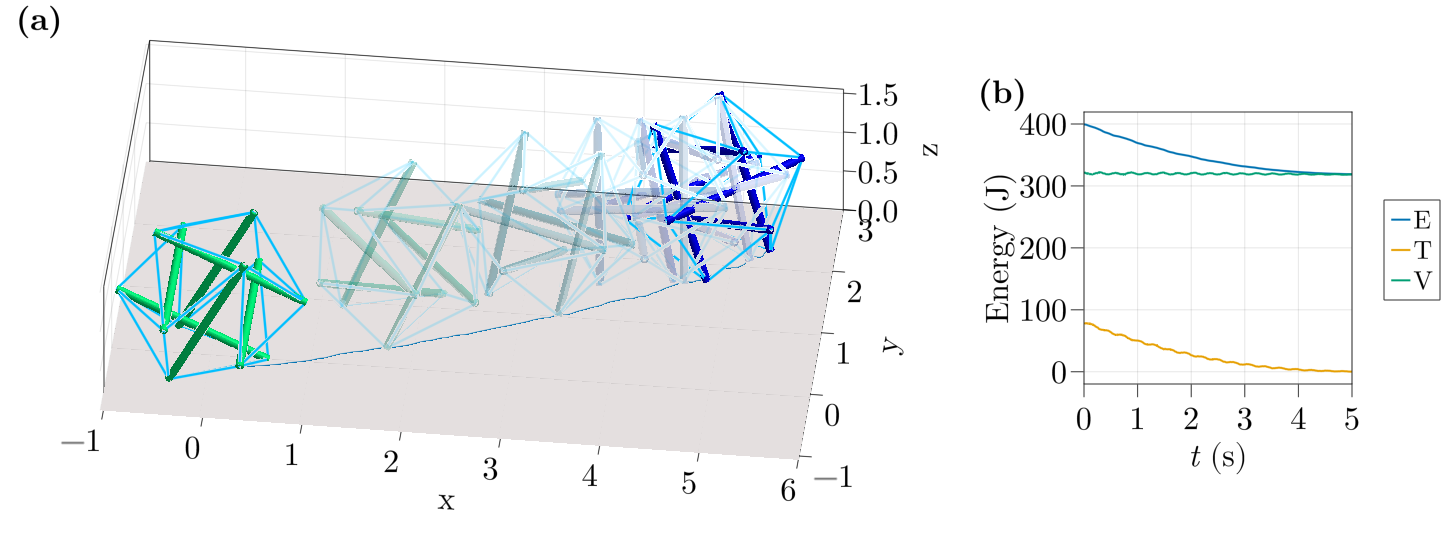

In [8]:
tspan = (0.0,5.0)
h = 1e-2
prob = RB.DynamicsProblem(
    ballbot,
    flatplane,
    RB.RestitutionFrictionCombined(
        RB.NewtonRestitution(),
        RB.CoulombFriction(),
    )
)
@time RB.solve!(prob,solver;tspan,dt=h,ftol=1e-14,exception=false)


me = RB.mechanical_energy!(ballbot);

GM.activate!(;scalefactor); with_theme(theme_pub;
        size = (0.8tw,0.30tw),
        figure_padding = (-2fontsize,0.5fontsize,0,0),
        Axis3 = (
            azimuth = 4.825530633326982,
            elevation = 0.6726990816987243
        )
    ) do
    fig = Figure()
    gd1 = fig[1,1] = GridLayout()
    gd2 = fig[1,2] = GridLayout(;tellheight=false)
    steps = 1:100:501
    nstep = length(steps)
    alphas = fill(0.15,nstep)
    alphas[1:3] = [1,0.2,0.2]
    alphas[end] = 1
    cg = cgrad(:winter, length(steps), categorical = true, rev = true)
    r1p2 = RB.get_trajectory!(ballbot,1,2)
    r6p2 = RB.get_trajectory!(ballbot,6,2)
    r2p1 = RB.get_trajectory!(ballbot,2,1)
    me = RB.mechanical_energy!(ballbot,)
    plot_traj!(ballbot;
        AxisType = Axis3,
        fig = gd1,
        xlims = [-1,6],
        ylims = [-1,3],
        zlims = [-1e-3,1.55],
        doslide = false,
        showinfo = true,
        showpoints = false,
        showlabels = false,
        showtitle = false,
        showcables = false,
        showmesh = false,
        showwire = false,
        sup! = (ax,_,_) -> begin
            for (i,step) in enumerate(steps)
                RB.goto_step!(ballbot,step)
                tgvis = deepcopy(ballbot.structure)
                (;r,g,b) = cg[i]
                db = Makie.parse(Makie.RGBA,"deepskyblue")
                RB.viz!(ax,tgvis;
                showcables=true,
                cablecolor=Makie.RGBAf(db.r,db.g,db.b,Makie.N0f8(alphas[i])),
                meshcolor = Makie.RGBAf(r,g,b,alphas[i]))
            end
            lines!(ax,r2p1)
        end
    )
    ax2 = Axis(gd2[1,1];tellheight=false,xlabel=tlabel,ylabel = "Energy (J)")
    lines!(ax2,ballbot.traj.t,me.E,label="E")
    lines!(ax2,ballbot.traj.t,me.T,label="T")
    lines!(ax2,ballbot.traj.t,me.V,label="V")
    xlims!(ax2,extrema(ballbot.traj.t)...)
    Legend(gd2[1,2],ax2,)
    Label(
        gd1[1,1,TopLeft()],"($(alphabet[1]))",font=:bold,
        padding = (2.5fontsize,0,0,0)
    )
    Label(
        gd2[1,1,TopLeft()],"($(alphabet[2]))",font=:bold
    )
    colsize!(fig.layout,1,0.45tw)
    rowsize!(gd2,1,0.15tw)
    rowgap!(fig.layout,0)
    savefig(fig,"ballbot_sliding")
    fig
end

convergence analysis

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:02:15
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:02:06
[ Info: Saving to ballbot_sliding_convergence.pdf


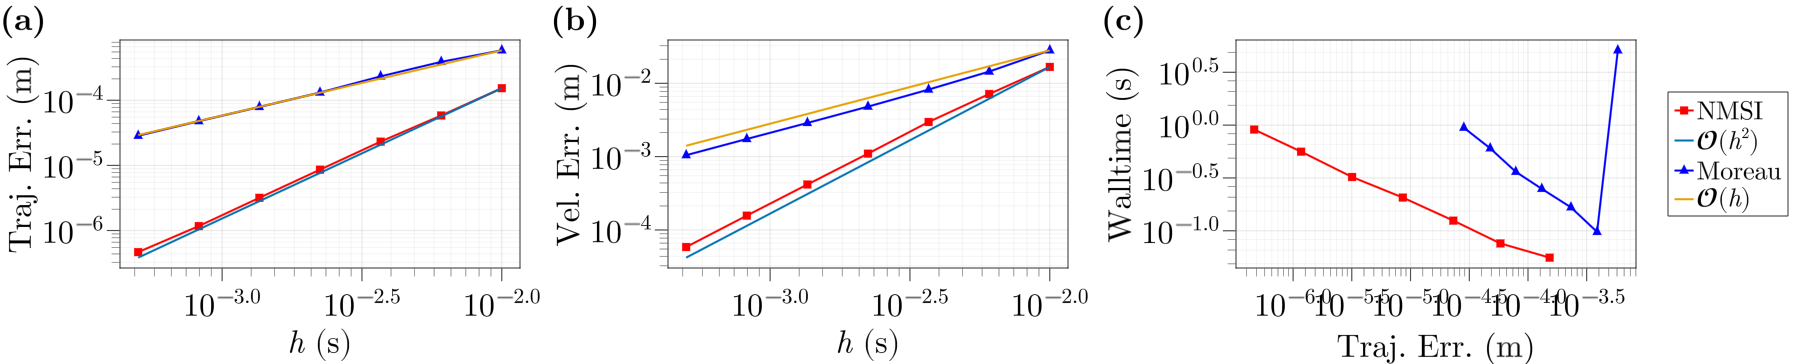

In [9]:
dts = vcat([10^(-s) for s in range(2,3.3;length=7)],5e-6)
stats_superballs_dt = [
    begin
        ballbot_dt = deepcopy(ballbot)
        prob = RB.DynamicsProblem(
            ballbot_dt,flatplane,
            RB.RestitutionFrictionCombined(
                RB.NewtonRestitution(),
                RB.CoulombFriction(),
            )
        )
        @timed RB.solve!(prob,
            RB.DynamicsSolver(
                solver,
                RB.InnerLayerContactSolver(
                    RB.InteriorPointMethod()
                ),
            );
            tspan=(0.0,0.1),dt,ftol=1e-14,
            maxiters=500,exception=false
        ).prob.bot
    end
    for dt in dts, solver in (RB.Zhong06(),RB.Moreau(0.5))
];

superballs_dt = map((x)->x.value,stats_superballs_dt);

GM.activate!(;scalefactor); with_theme(theme_pub;
        size = (1tw,0.2tw)
    ) do
    fig = Figure()
    ax1 = Axis(fig[1,1], ylabel="Traj. Err. (m)")
    ax2 = Axis(fig[1,2], ylabel="Vel. Err. (m)")
    ax3 = Axis(fig[1,3], xlabel="Traj. Err. (m)", ylabel="Walltime (s)")
    _,traj_nmsi = RB.get_err_avg(vcat(superballs_dt[begin:end-1,1],superballs_dt[end,2]);bid=2,pid=1,di=1)
    _,traj_moreau = RB.get_err_avg(superballs_dt[:,2];bid=2,pid=1,di=1)
    _,vel_nmsi = RB.get_err_avg(vcat(superballs_dt[begin:end-1,1],superballs_dt[end,2]);bid=2,pid=1,di=1,field=:midvel)
    _,vel_moreau = RB.get_err_avg(superballs_dt[:,2];bid=2,pid=1,di=1,field=:midvel)
    plot_convergence_order!(ax1,dts[begin:end-1],traj_nmsi;orders=[2])
    plot_convergence_order!(ax1,dts[begin:end-1],traj_moreau;label="Moreau",color=:blue,marker=:utriangle,orders=[1])
    plot_convergence_order!(ax2,dts[begin:end-1],vel_nmsi;orders=[2])
    plot_convergence_order!(ax2,dts[begin:end-1],vel_moreau;label="Moreau",color=:blue,marker=:utriangle,orders=[1])

    nmsi_time = map((x)->x.time-x.gctime,stats_superballs_dt[begin:end-1,1])
    moreau_time = map((x)->x.time-x.gctime,stats_superballs_dt[begin:end-1,2])
    scatterlines!(ax3,traj_moreau,moreau_time;marker=:utriangle,color=:blue,)
    scatterlines!(ax3,traj_nmsi,nmsi_time;marker=:rect,color=:red)
    ax3.xscale = Makie.log10
    ax3.xminorticksvisible = true
    ax3.xminorgridvisible = true
    ax3.xminorticks = IntervalsBetween(8)
    ax3.yscale = Makie.log10
    ax3.yminorticksvisible = true
    ax3.yminorgridvisible = true
    ax3.yminorticks = IntervalsBetween(4)

    Legend(fig[1,4],ax1)

    Label(fig[1,1,TopLeft()],"($(alphabet[1]))",font=:bold)
    Label(fig[1,2,TopLeft()],"($(alphabet[2]))",font=:bold)
    Label(fig[1,3,TopLeft()],"($(alphabet[3]))",font=:bold)
    colgap!(fig.layout,fontsize)
    savefig(fig,"ballbot_sliding_convergence";backend=CM)
    fig
end

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*